# Credit Card Classification

# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, recall_score, auc, accuracy_score, f1_score, precision_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split

from utils import check_class_imbalance, check_nulls_dupes, create_sklearn_pipeline, sampling_pipeline

# EDA Analysis

In [11]:
df = pd.read_csv("/Users/maukanmir/Downloads/creditcard.csv", nrows=25000)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,33469,-0.311372,0.759277,1.650994,1.091764,0.747545,0.924909,0.675067,-0.052870,-0.170135,...,-0.040939,0.357128,-0.406407,-0.871783,0.265729,-0.089932,-0.000652,-0.116323,20.00,0
24996,33469,-0.745983,0.518650,1.533865,1.335173,0.376647,0.019838,0.221768,0.328102,-0.390842,...,0.054737,0.314848,-0.034032,0.218806,-0.161277,-0.250516,0.402972,0.202283,18.04,0
24997,33470,-0.618962,1.302587,1.182654,-0.046862,0.267769,-0.527204,0.658724,0.029762,-0.331111,...,-0.259006,-0.529602,0.006277,0.042659,-0.155856,0.103680,0.378294,0.154449,1.79,0
24998,33471,1.377620,-0.279881,0.119446,-0.594892,-0.764533,-1.241617,-0.010524,-0.388173,-1.259304,...,-0.784787,-1.841549,0.264707,0.388256,0.013974,0.618726,-0.072529,0.013620,25.48,0


# Check For Nulls

In [12]:
check_nulls_dupes(df)

The Amount of Null Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
The Amount of Duplicated Values: 95


In [13]:
df.drop_duplicates(inplace=True)

# Check Class Imbalance

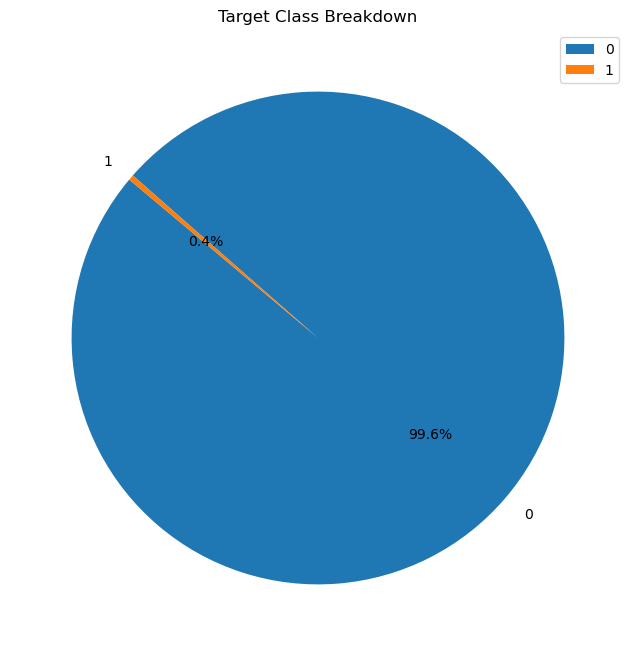

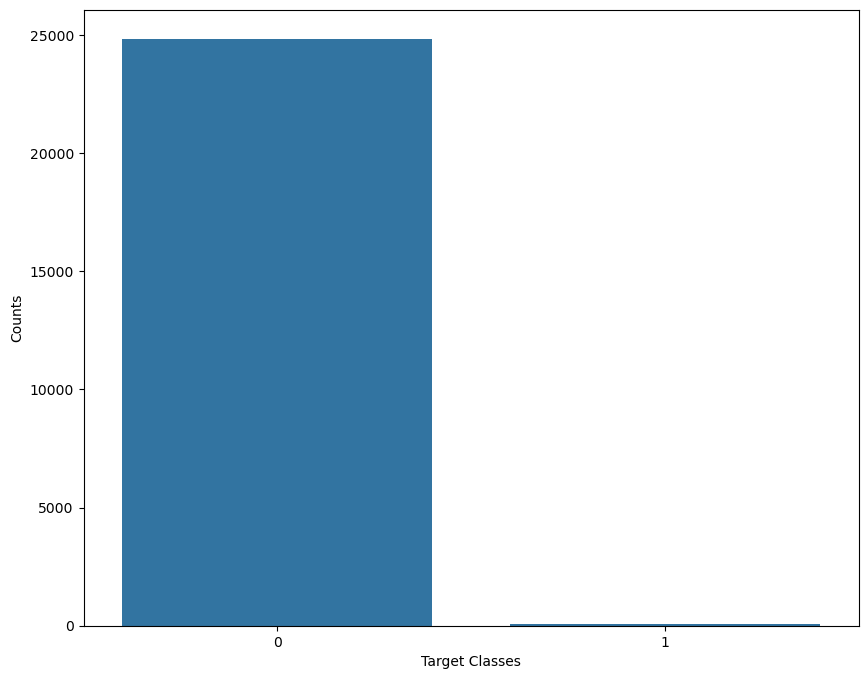

In [14]:
check_class_imbalance(df["Class"])

# Major Class Balance